In [1]:
!pip install pingouin

     ---------------------------------------- 0.0/198.6 kB ? eta -:--:--
     ------ -------------------------------- 30.7/198.6 kB 1.4 MB/s eta 0:00:01
     ------- ----------------------------- 41.0/198.6 kB 495.5 kB/s eta 0:00:01
     ------- ----------------------------- 41.0/198.6 kB 495.5 kB/s eta 0:00:01
     --------------------------------- ---- 174.1/198.6 kB 1.1 MB/s eta 0:00:01
     --------------------------------- ---- 174.1/198.6 kB 1.1 MB/s eta 0:00:01
     -----------------------------------  194.6/198.6 kB 845.5 kB/s eta 0:00:01
     ------------------------------------ 198.6/198.6 kB 753.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 653.6 kB/s eta 0:00:16
   ---------------------------------------- 0.1/9


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from sklearn.datasets import load_iris
from scipy import stats
import pingouin as pg
import pandas as pd

In [4]:
# import the data
df_iris = load_iris(as_frame=True)

df = df_iris["data"]
target = df_iris["target"]
df['species'] = target
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')


In [5]:
setosa = df[(df['species'] == 0)]
versicolor = df[(df['species'] == 1)]

In [6]:
# homogeneity
stats.levene(setosa['sepal width (cm)'], versicolor['sepal width (cm)'])

LeveneResult(statistic=0.591002044989776, pvalue=0.44388064024686213)

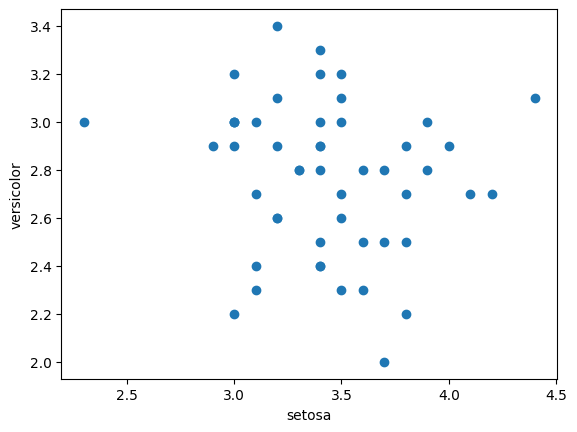

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x=setosa['sepal width (cm)'].values, y = versicolor['sepal width (cm)'])
plt.xlabel('setosa')
plt.ylabel('versicolor')
plt.show()

In [11]:
# Shapiro-Wilk test for normality
stats.shapiro(setosa['sepal width (cm)'])

ShapiroResult(statistic=0.971718966960907, pvalue=0.2715126574039459)

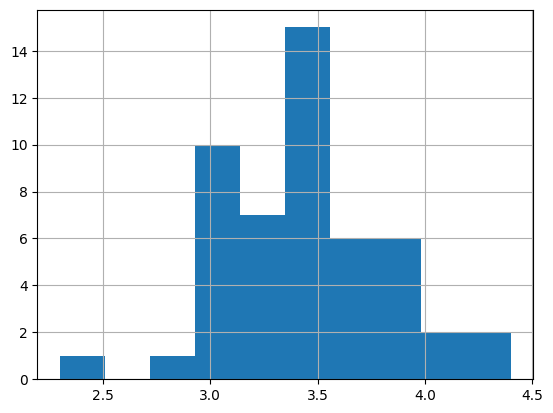

In [10]:
setosa['sepal width (cm)'].hist()
plt.show()

In [8]:
stats.shapiro(versicolor['sepal width (cm)'])

ShapiroResult(statistic=0.9741329550743103, pvalue=0.3379843533039093)

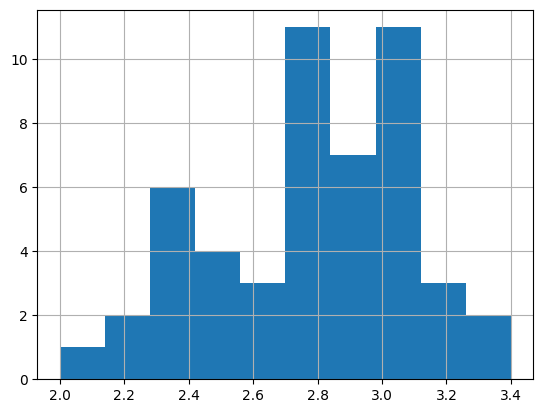

In [12]:
versicolor['sepal width (cm)'].hist()
plt.show()

In [9]:
#t-test 
stats.ttest_ind(setosa['sepal width (cm)'], versicolor['sepal width (cm)'])

TtestResult(statistic=9.454975848128596, pvalue=1.8452599454769322e-15, df=98.0)

In [10]:
#ANOVA TEST 
df = pg.read_dataset('mixed_anova')
pg.anova(data=df, dv='Scores', between='Group', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Group,5.459963,1,5.459963,5.243656,0.0232,0.028616
1,Within,185.342729,178,1.041251,NaN,NaN,NaN


In [11]:
pg.rm_anova(data=df, dv='Scores', within='Time', subject='Subject', detailed=True)

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Time,7.628428,2,3.814214,3.912796,0.022629,0.039981,0.998751
1,Error,115.027023,118,0.974805,NaN,NaN,NaN,NaN
